In [1]:
import pandas as pd
import seaborn as sns

In [3]:
penguins = sns.load_dataset("penguins")

In [4]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
# non-destructive idempotent
penguins["bill_depth_m"] = penguins["bill_depth_mm"]/1000

In [6]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_depth_m
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0.0187
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0.0174
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0.0180
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0.0193


In [7]:
# descructive and non-idempotent
penguins["flipper_length_mm"] = penguins["flipper_length_mm"] / 1000

In [8]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_depth_m
0,Adelie,Torgersen,39.1,18.7,0.181,3750.0,Male,0.0187
1,Adelie,Torgersen,39.5,17.4,0.186,3800.0,Female,0.0174
2,Adelie,Torgersen,40.3,18.0,0.195,3250.0,Female,0.0180
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,0.193,3450.0,Female,0.0193


In [10]:
# destructive and idempotent
penguins["bill_length_mm"] = penguins["bill_length_mm"].round(0)

In [16]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_depth_m
0,Adelie,Torgersen,39.0,18.7,0.181,3750.0,Male,0.0187
1,Adelie,Torgersen,40.0,17.4,0.186,3800.0,Female,0.0174
2,Adelie,Torgersen,40.0,18.0,0.195,3250.0,Female,0.0180
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,37.0,19.3,0.193,3450.0,Female,0.0193


In [17]:
# slicing
gentoos = penguins[penguins["species"] == 'Gentoo']

In [18]:
gentoos.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_depth_m
220,Gentoo,Biscoe,46.0,13.2,0.211,4500.0,Female,0.0132
221,Gentoo,Biscoe,50.0,16.3,0.230,5700.0,Male,0.0163
222,Gentoo,Biscoe,49.0,14.1,0.210,4450.0,Female,0.0141
223,Gentoo,Biscoe,50.0,15.2,0.218,5700.0,Male,0.0152
224,Gentoo,Biscoe,48.0,14.5,0.215,5400.0,Male,0.0145


## Bivariate analysis

#### Num vs Num

In [19]:
iris = sns.load_dataset('iris')

In [20]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

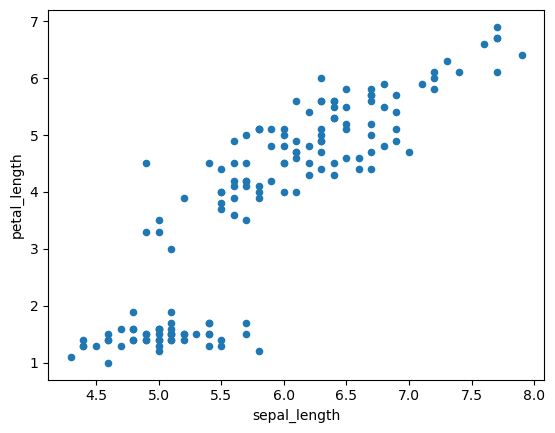

In [22]:
iris.plot(kind='scatter', x='sepal_length', y='petal_length')

scatter plot voor het analyseren van de corelatie van grote van de bladen. Het gat in de scatterplot kan mogelijk komen door de verschillende soorten. Heatmap kan ook gebruikt worden als er erg veel datapunten zijn waardoor het lastig om het patroon te zien is

### Pearson correlation 
Meet de lineare correlatie tussen twee numerieke waarde, resultaat is tussen -1 en 1
* -1 is een perfecte negatieve lineare relatie
* 0 geeft aand dat er geen lineare relatie is
* 1 geeft aan dat er een perfecte positive lineare relatie is.

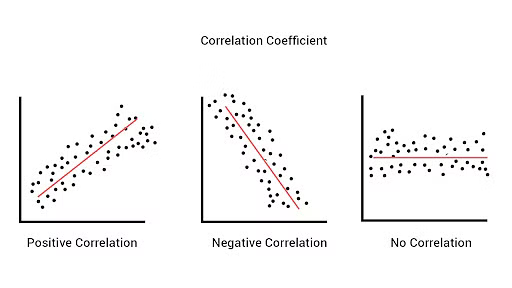

In [26]:
iris['sepal_length'].mean()

5.843333333333335

In [27]:
iris['sepal_length'][0]

5.1

In [31]:
iris[['sepal_length','petal_length']].corr()

,sepal_length,petal_length
sepal_length,1.000000,0.871754
petal_length,0.871754,1.000000


negeer de 1 waarbij de colommen met zichzelf worden vergeleken. Petal_lenght en sepal_length zijn positief gecorreleerd

In [33]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [42]:
irisCorrelations = iris.corr()
irisCorrelations.style.background_gradient(axis=None).format(precision=2)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.00,-0.12,0.87,0.82
sepal_width,-0.12,1.00,-0.43,-0.37
petal_length,0.87,-0.43,1.00,0.96
petal_width,0.82,-0.37,0.96,1.00


<AxesSubplot:>

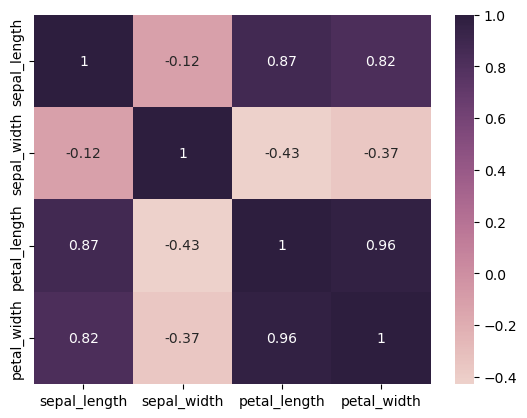

In [45]:
sns.heatmap(data=irisCorrelations, cmap=sns.cubehelix_palette(as_cmap=True), annot=True)